# Mini Project: Analysis of New Weapon for Change in Dps


Asuming Weapon Echo_Sabar Released in Fictional RPG wuthering Wavws.
Analysing Dps Performance Test By:
- Confidence Interval (95%)
- Hypothesis Testing (Z-Test)

## Scenario Given:
- A new weapon called “Echo Saber-X” is said to increase DPS. You’re given simulated data to test if this weapon actually performs better than the population average DPS of 2000.

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

## Task 1:
- Simulated Population DPS DATA 

In [2]:
pop_dps = np.random.exponential(scale=2000, size=100000)
pop_mean = np.mean(pop_dps)

In [3]:
echo_Sabar_DPS = np.random.normal(loc=2150, scale=300, size=50)
echo_Sabar_mean = np.mean(echo_Sabar_DPS)
echo_Sabar_Std = np.std(echo_Sabar_DPS)

## Task 2:
- Confidence Interval That im 95% Sure My Data is btween X and Y Values 

In [4]:
CI_Pos = echo_Sabar_mean + 1.96*(echo_Sabar_Std/np.sqrt(len(echo_Sabar_DPS)))
CI_Neg = echo_Sabar_mean - 1.96*(echo_Sabar_Std/np.sqrt(len(echo_Sabar_DPS)))
print(f"Confidence Interval: {CI_Pos}")
print(f"Confidence Interval: {CI_Neg}")

Confidence Interval: 2209.4582804653714
Confidence Interval: 2033.983549502445


## Task 3:
- Hypothesis Testing Z-Test (One Tail Test)

In [5]:
SE = echo_Sabar_Std / np.sqrt(len(echo_Sabar_DPS))
Z_score = (echo_Sabar_mean - pop_mean )/ SE
P_Value = 1 - norm.cdf(Z_score)
if P_Value < 0.05:
    print(f"Reject The Null Hypothesis It Improves DPS: P = {P_Value}")
    print(f"Echo Sabar Mean {echo_Sabar_mean} > = Pop_Mean{pop_mean}")
else:
    print(f"NOT Enough Evidence to Say That the weapon is Better Failed to Reject Null Hypothesis H0: P = {P_Value}")
    print(f"Echo Sabar Mean {echo_Sabar_mean} = Pop_Mean {pop_mean}")

Reject The Null Hypothesis It Improves DPS: P = 0.0019482265871951787
Echo Sabar Mean 2121.720914983908 > = Pop_Mean1992.51308574654


## Task 4:
- Visualising DATA 
- Bootstrapped 95% Confidence Intervals of Echo Saber-X
- x: DPS
- y: Bootstrap Sample Index

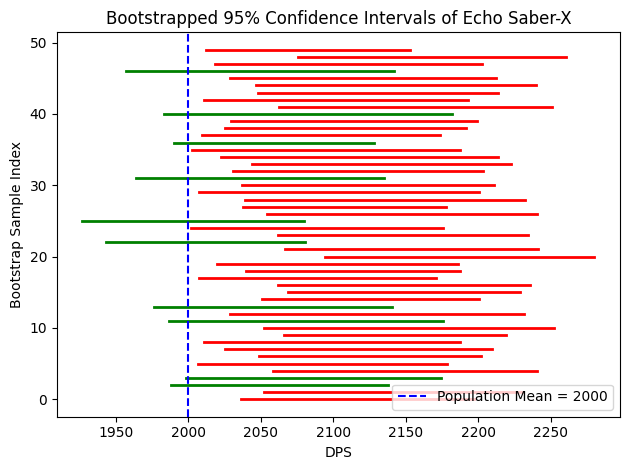

In [6]:
CI = []
for _ in range(50):
    Boot_Sample = np.random.choice(echo_Sabar_DPS,size=50,replace=True)
    se = np.std(Boot_Sample,ddof=1)/np.sqrt(len(Boot_Sample))
    M = np.mean(Boot_Sample)
    High = M + 1.96*(se)
    Low = M - 1.96*(se)
    CI.append((Low , High))
for i ,(Low, High) in enumerate(CI):
    Check = Low < 2000 < High
    color = "green" if Check else "red"
    plt.plot([Low,High],[i,i], color, linewidth=2)
plt.axvline(2000 , linestyle="dashed", color="blue",label="Population Mean = 2000")
plt.xlabel("DPS")
plt.ylabel("Bootstrap Sample Index")
plt.title("Bootstrapped 95% Confidence Intervals of Echo Saber-X")
plt.legend()
plt.tight_layout()
plt.show()